<a href="https://colab.research.google.com/github/ricsajr/Classification_behind_the_scenes/blob/main/Machine_Learning_classificacao_por_tras_dos_panos_KNN_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Nova seção

In [2]:
dados = pd.read_csv('/Customer-Churn.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dados.shape

(7043, 18)

In [5]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [6]:
traducao_dic = {
    'Sim':1,
    'Nao':0
}

dados_modificados = dados[['Conjuge', 'Dependentes','TelefoneFixo','PagamentoOnline', 'Churn']].replace(traducao_dic)
dados_modificados.head()


,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [7]:
#get_dummies pegará as colunas categoricas com mais de uma categoria e divirá-as em outras colunas com valores 0, ou 1
dummie_data = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes','TelefoneFixo','PagamentoOnline', 'Churn'], axis=1))
#junção dos dados modificados com os que ja tinhamos
dados_finais = pd.concat([dados_modificados, dummie_data], axis=1)
dados_finais.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


In [8]:
pd.set_option("display.max_columns", 39)

In [9]:
dados_finais.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [10]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]
#Ymaria?

In [11]:
x = dados_finais.drop('Churn', axis=1)
y = dados_finais['Churn']

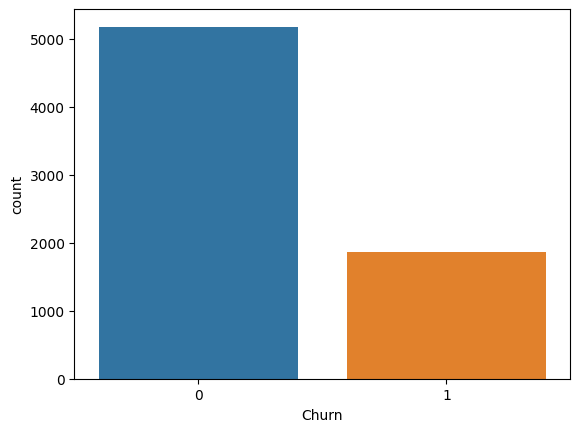

In [12]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_finais)

In [13]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)
x, y = smt.fit_resample(x,y)

dados_finais = pd.concat([x,y], axis = 1)
dados_finais.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,...,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,...,0,1,0,0,0
1,0,0,1,0,0,...,0,0,1,0,0


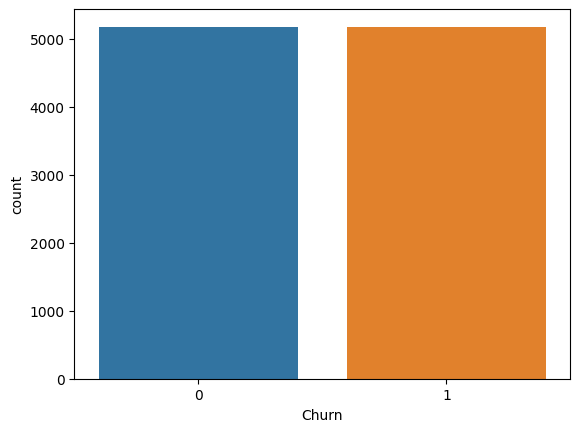

In [15]:
#No caso, como os dados já haviam sido tratados previamente, o balanceamento apenas se manteve
ax = sns.countplot(x='Churn', data = dados_finais)

In [16]:
#Agora vamos começar a trabalhar os dados que já estão separados em x e y para poder classificar Xmaria, nossa nova cliente, pelo método KNN
#primeiro vamos deixar todos os valores na mesma escala
# O que StandardScaler faz ao normalizar é pegar cada um dos atributos dos clientes existentes, subtrair a média e dividir pelo desvio padrão
from sklearn.preprocessing import StandardScaler
x = dados_finais.drop('Churn', axis=1)
y = dados_finais['Churn']

In [17]:
norm = StandardScaler()

x_normalizado = norm.fit_transform(x)
#Agora verificaremos como ficou o cliente [0] normalizado
x_normalizado[0]

array([ 1.26542767, -0.52771004, -3.06083934,  0.81482091, -0.41318358,
       -1.10771815, -1.3217706 , -0.88447396,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.86827317, -0.44617598,
       -0.51721942, -0.95834643, -0.44617598,  1.57389661,  1.04285807,
       -0.44617598, -0.64211419,  0.87979784, -0.44617598, -0.52426638,
        1.18690873, -0.44617598, -0.77707385,  1.20311799, -0.44617598,
       -0.78976268, -0.44648735,  0.73788726, -0.41989297, -0.42576817,
        1.30373042, -0.47912706, -0.4360152 ])

In [18]:
#Agora normalizaremos os dados de Maria, enquanto dentro da função de normalização, antes transformaremos o vetor Xmaria em um dataframe
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = x.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52771004,  0.32670777,  0.81482091, -0.41318358,
        -1.14938255, -0.97236043,  1.13061554, -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.86827317, -0.44617598,
        -0.51721942, -0.95834643, -0.44617598,  1.57389661,  1.04285807,
         2.24126814, -0.64211419, -1.13662476,  2.24126814, -0.52426638,
         1.18690873, -0.44617598, -0.77707385, -0.83117367, -0.44617598,
         1.26620316, -0.44648735, -1.35522058,  2.38155929, -0.42576817,
        -0.76702973, -0.47912706,  2.293498  ]])

In [19]:
#Agora vamos calcular como exemplo a distância da Maria para o cliente 0 através da métrica euclidiana
# A RAIZ QUADRADA DO SOMATÓRIO DA DIFERENÇA DE TODOS OS ATRIBUTOS ELEVADO AO QUADRADO 

In [20]:
import numpy as np

In [21]:
a = Xmaria_normalizado

In [22]:
b = x_normalizado[0]

In [23]:
#subtração
a - b

array([[-2.05567434,  0.        ,  3.38754711,  0.        ,  0.        ,
        -0.0416644 ,  0.34941017,  2.0150895 , -3.49991084,  0.        ,
        -2.17376025,  2.00184354,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.68744412,  0.        , -2.01642259,  2.68744412,  0.        ,
         0.        ,  0.        ,  0.        , -2.03429166,  0.        ,
         2.05596584,  0.        , -2.09310784,  2.80145225,  0.        ,
        -2.07076016,  0.        ,  2.72951321]])

In [24]:
#depois realizamos a exponenciação
np.square(a-b)

array([[4.22579699e+00, 0.00000000e+00, 1.14754754e+01, 0.00000000e+00,
        0.00000000e+00, 1.73592202e-03, 1.22087466e-01, 4.06058568e+00,
        1.22493759e+01, 0.00000000e+00, 4.72523363e+00, 4.00737757e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.22235589e+00, 0.00000000e+00, 4.06596007e+00, 7.22235589e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.13834258e+00, 0.00000000e+00, 4.22699553e+00, 0.00000000e+00,
        4.38110042e+00, 7.84813473e+00, 0.00000000e+00, 4.28804763e+00,
        0.00000000e+00, 7.45024235e+00]])

In [25]:
#Depois vem a soma
np.sum(np.square(a-b))

91.7112036526817

In [26]:
# A raiz desse valor é o resultado desejado (a distância entre maria e o cliente 0)
np.sqrt(91.7112036526817)

9.576596663360199

# Implementando o **modelo**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_normalizado, y, test_size=0.3, random_state=123)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
#instanciando o KNN que vem com o padrão de 5 vizinhos
knn = KNeighborsClassifier(metric='euclidean')

In [31]:
#treinando o modelo
knn.fit(x_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [35]:
predicted = knn.predict(x_teste)
predicted

array([1, 0, 0, ..., 0, 1, 1])